In [16]:
!pip install mlxtend

In [20]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules





In [2]:
df = pd.read_csv(r"C:\Users\chera\INFO 5906 Data\FAERS_ASTHMA\Data\ADHD_Data_Result\ADHDFinal\ADHD_norm_data.csv", low_memory=False)


In [3]:
df

,primaryid,caseid,drugname,pt,UMLS_pt,UMLS_drugname
0,67928046,6792804,omalizumab,Anaphylactic reaction,anaphylaxis,omalizumab
1,67928046,6792804,omalizumab,Dizziness,Dizziness,omalizumab
2,67928046,6792804,omalizumab,Hyperhidrosis,Hyperhidrosis disorder,omalizumab
3,67928046,6792804,omalizumab,Palpitations,Palpitations,omalizumab
4,71671609,7167160,omalizumab,Asthma,Asthma,omalizumab
...,...,...,...,...,...,...
532895,986902730,9869027,xolair,Diarrhoea,Diarrhea,Xolair
532896,986902730,9869027,xolair,Pharyngeal swelling,Pharyngeal swelling,Xolair
532897,986902730,9869027,xolair,Obstructive airways disorder,"Lung Diseases, Obstructive",Xolair
532898,986902730,9869027,xolair,Pain,Pain,Xolair


In [4]:
drugname_counts = df['UMLS_drugname'].value_counts().head(10)
print(drugname_counts)


Xolair                                                                                                250444
Dupixent                                                                                               51173
mepolizumab                                                                                            43456
Nucala                                                                                                 25924
Symbicort                                                                                              25507
albuterol sulfate                                                                                      24164
Fasenra                                                                                                15584
albuterol                                                                                              12995
montelukast                                                                                            11633
14 ACTUAT fluticaso

In [5]:

# calculating the PRR value for each name
for drugname in df['UMLS_drugname'].unique():
    for pt in df[df['UMLS_drugname'] == drugname]['UMLS_pt'].unique():
        a = df[(df['UMLS_drugname'] == drugname) & (df['UMLS_pt'] == pt)].shape[0]
        b = df[(df['UMLS_drugname'] == drugname) & (df['UMLS_pt'] != pt)].shape[0]
        c = df[(df['UMLS_drugname'] != drugname) & (df['UMLS_pt'] == pt)].shape[0]
        d = df[(df['UMLS_drugname'] != drugname) & (df['UMLS_pt'] != pt)].shape[0]

        if b != 0 and a + c != 0 and d != 0:
            prr = (a / (a + c)) / (b / (b + d))
            df.loc[(df['UMLS_drugname'] == drugname) & (df['UMLS_pt'] == pt), 'PRR'] = prr

# filtering the rows where PRR > 3 only
prr_filtered = df.query('PRR > 3')
prr_filtered.head()

,primaryid,caseid,drugname,pt,UMLS_pt,UMLS_drugname,PRR
0,67928046,6792804,omalizumab,Anaphylactic reaction,anaphylaxis,omalizumab,4.473854
7,71671609,7167160,omalizumab,Increased upper airway secretion,Increased upper airway secretion,omalizumab,6.299640
11,71671609,7167160,omalizumab,Nasal polyps,Nasal Polyps,omalizumab,4.021025
19,72518772,7251877,albuterol sulfate,Lung hyperinflation,Lung hyperinflation,albuterol sulfate,3.136979
63,76273652,7627365,symbicort,Chronic fatigue syndrome,Chronic Fatigue Syndrome,Symbicort,5.969619


In [43]:
prr_filtered.shape

(96424, 7)

In [6]:
prr_filtered.head(50)

,primaryid,caseid,drugname,pt,UMLS_pt,UMLS_drugname,PRR
0,67928046,6792804,omalizumab,Anaphylactic reaction,anaphylaxis,omalizumab,4.473854
7,71671609,7167160,omalizumab,Increased upper airway secretion,Increased upper airway secretion,omalizumab,6.299640
11,71671609,7167160,omalizumab,Nasal polyps,Nasal Polyps,omalizumab,4.021025
19,72518772,7251877,albuterol sulfate,Lung hyperinflation,Lung hyperinflation,albuterol sulfate,3.136979
63,76273652,7627365,symbicort,Chronic fatigue syndrome,Chronic Fatigue Syndrome,Symbicort,5.969619
67,76273652,7627365,symbicort,Dysphonia,Dysphonia,Symbicort,3.071773
70,76273652,7627365,symbicort,Mental impairment,Mental handicap,Symbicort,4.501803
73,76273652,7627365,symbicort,Off label use,Off-Label Treatment,Symbicort,7.433709
141,819414710,8194147,omalizumab,Bronchiolitis,Bronchiolitis,omalizumab,3.509088
142,819414710,8194147,omalizumab,Bronchomalacia,Bronchomalacia,omalizumab,3.087341


In [7]:
highest_prr = prr_filtered.head(50)['PRR'].max()
print(highest_prr)


24222.636363636364


In [44]:
sorted_prr = prr_filtered.sort_values('PRR', ascending=False)
print(sorted_prr.head(50))


        primaryid    caseid                                        drugname  \
122539  138639192  13863919                        prednisolone tablets 5mg   
422607  197648301  19764830                                    atorvastatin   
422609  197648901  19764890                                    atorvastatin   
421899  197466011  19746601                                    atorvastatin   
421719  197404191  19740419                                    atorvastatin   
187868  156538041  15653804                            albuterol tablet 2mg   
332195  181135491  18113549  omalizumab (omalizumab 150mg/ml inj, syr, 1ml)   
424001  198270691  19827069                        hydrocortisone butyrate.   
422258  197551551  19755155               atorvastatin/atorvastatin calcium   
44359   105580903  10558090        fluticasone propionate inhalation powder   
480303  209116061  20911606                                        prilosec   
332197  181135491  18113549  omalizumab (omalizumab 

In [45]:
sorted_prr.to_csv('top_prr.csv', index=False)

In [10]:
baskets = []
num = 1
temp_basket = []
last_line = False
for index, row in prr_filtered.iterrows():
    ## check whether the new row is from the same patient or not
    ## If it is the same patient, the new row will be put into the same basket
    ## If not, create a new basket.
    if num == 1:
        previous_id = row["caseid"]
        current_id = row["caseid"]
        first_line = True
    elif num == prr_filtered.shape[0]:
        last_line = True
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    else:
        first_line = False
        previous_id = current_id
        current_id = row["caseid"]
    ## if the new row is from the same patient, only add the adverse drug reaction
    if previous_id == current_id :
        same_patient = True
    else:
        same_patient = False
    if same_patient:
        if row["UMLS_drugname"] not in temp_basket:
            temp_basket.append(row["UMLS_drugname"])
        if row["UMLS_pt"] not in temp_basket:
            temp_basket.append(row["UMLS_pt"])
    else:
        baskets.append(temp_basket)
        temp_basket = []
        temp_basket.append(row["UMLS_drugname"])
        temp_basket.append(row["UMLS_pt"])
    if last_line:
        baskets.append(temp_basket)
    num += 1


In [11]:
len(baskets)

44321

In [12]:
baskets[1]

['omalizumab', 'Increased upper airway secretion', 'Nasal Polyps']

In [13]:
items = list()
for basket in baskets:
    items.extend(basket)
print(set(items))
print(len(set(items)))


{'Excision of vein', 'Keratoconus', 'Reduced forced vital capacity', 'Cyst of uterus', 'Endometrial disorder', 'Nerve injury', 'Ocular Motility Disorders', 'Hemoglobin increased', 'Corneal degeneration', 'Auscultation', 'Lung infection pseudomonal', 'Disorientation', 'Headache due to cold exposure', 'Systemic Inflammatory Response Syndrome', 'Renal angle tenderness', 'Negativism', 'Keratoconjunctivitis, Vernal', 'Hereditary hemorrhagic telangiectasia', 'Blepharitis', 'Gastrointestinal Surgical Procedure', 'omeprazole', 'Enteric campylobacteriosis', 'Obstruction of biliary tree', 'Glossalgia', 'Biopsy of liver (procedure)', 'Protein electrophoresis outside reference range', 'Arthralgia', 'Gastrointestinal cancer metastatic', 'Low Cardiac Output', 'Incorrect dose administered', 'Bradykinesia', 'Disorder of tendon', 'Stridor', 'Ventricular Fibrillation', 'Lower respiratory tract congestion', 'Peripheral T-Cell Lymphoma', 'Contusion of kidney', 'Traumatic fracture', 'Blood potassium increa

In [14]:
# Create empty list to contain the converted data
converted_vals = []
for row in baskets:
    labels = {}
    # Find items that do not occur in the transaction
    not_occurred = list(set(items) - set(row))
    # Find items that occur in the transaction
    occurred = list(set(items).intersection(row))
    for nc in not_occurred:
        labels[nc] = 0
    for occ in occurred:
        labels[occ] = 1
    converted_vals.append(labels)

converted_basket = pd.DataFrame(converted_vals)
print(converted_basket.head())

   Excision of vein  Keratoconus  Reduced forced vital capacity  Sluggishness  \
0                 0            0                              0             0   
1                 0            0                              0             0   
2                 0            0                              0             0   
3                 0            0                              0             0   
4                 0            0                              0             0   

   Unspecified Abortion  Cyst of uterus  Endometrial disorder  \
0                     0               0                     0   
1                     0               0                     0   
2                     0               0                     0   
3                     0               0                     0   
4                     0               0                     0   

   Eye Infections, Viral  Bullous Dermatitis  Plethysmography  ...  \
0                      0                   0        

In [26]:
frequent_itemsets = apriori(converted_basket, min_support=0.01, use_colnames=True)

print(frequent_itemsets)

      support                                           itemsets
0    0.021931                                        (Exanthema)
1    0.040771                                      (montelukast)
2    0.047743                      (Product dose omission issue)
3    0.039958                                          (Fasenra)
4    0.010356                                    (Sleeplessness)
..        ...                                                ...
118  0.020983  (Therapeutic product effect incomplete, Wheezi...
119  0.018343  (Therapeutic product effect incomplete, Loss o...
120  0.010289  (Therapeutic product effect incomplete, Blood ...
121  0.018930  (Therapeutic product effect incomplete, Sleep ...
122  0.018095  (Wheezing, albuterol sulfate, Therapeutic prod...

[123 rows x 2 columns]


In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)

                                           antecedents  \
0                                           (Dupixent)   
1                                          (Exanthema)   
2                                        (montelukast)   
3                                            (Anxiety)   
4                                             (Nucala)   
..                                                 ...   
301                                         (Wheezing)   
302                                (albuterol sulfate)   
303            (Therapeutic product effect incomplete)   
304  (Sleep disorder due to a general medical condi...   
305  (Loss of personal independence in daily activi...   

                                           consequents  antecedent support  \
0                                          (Exanthema)            0.283568   
1                                           (Dupixent)            0.021931   
2                                            (Anxiety)            0.0

In [28]:
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.3) ].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
285,"(Therapeutic product effect incomplete, Wheezi...",(Sleep disorder due to a general medical condi...,0.021231,0.024142,0.018095,0.852285,35.302911,0.017583,6.606348
296,(Sleep disorder due to a general medical condi...,"(Therapeutic product effect incomplete, Wheezi...",0.024142,0.021231,0.018095,0.749533,35.302911,0.017583,3.907770
293,"(Wheezing, Sleep disorder due to a general med...","(Therapeutic product effect incomplete, Loss o...",0.023488,0.021999,0.018095,0.770413,35.021002,0.017579,4.259830
288,"(Therapeutic product effect incomplete, Loss o...","(Wheezing, Sleep disorder due to a general med...",0.021999,0.023488,0.018095,0.822564,35.021002,0.017579,5.503465
214,(Sleep disorder due to a general medical condi...,"(Wheezing, Loss of personal independence in da...",0.024142,0.027504,0.022495,0.931776,33.877958,0.021831,14.254395
...,...,...,...,...,...,...,...,...,...
92,"(Product dose omission issue, Product use issue)",(Dupixent),0.010898,0.283568,0.010604,0.973085,3.431580,0.007514,26.618219
1,(Exanthema),(Dupixent),0.021931,0.283568,0.020825,0.949588,3.348720,0.014606,14.211679
91,"(Dupixent, Product dose omission issue)",(Product use issue),0.029444,0.114438,0.010604,0.360153,3.147152,0.007235,1.384022
13,(Product use in unapproved indication),(Dupixent),0.023307,0.283568,0.020126,0.863504,3.045145,0.013517,5.248756


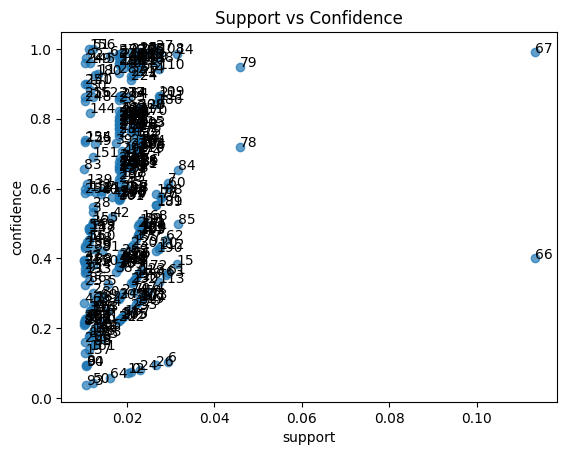

In [29]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
for i in range(rules.shape[0]):
    plt.text(rules.loc[i,"support"], rules.loc[i,"confidence"], str(i))
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [31]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Selecting all drugnames and variations to look at adverse reactions and get their counts# Selecting all drugnames and variations to look at adverse reactions and get their counts

In [38]:
# NDA020983 200 ACTUAT albuterol 0.09 MG/ACTUAT Metered Dose Inhaler [Ventolin]


# create a list of drug names to filter for
drug_names = ["NDA020983 200 ACTUAT albuterol 0.09 MG/ACTUAT Metered Dose Inhaler [Ventolin]"]

# filter rows where 'drugname' is in the list of drug names
drugname_df = df[df['UMLS_drugname'].isin(drug_names)]

# extract words from 'Reactions' column and tokenize them
reactions = drugname_df['UMLS_pt'].str.lower().str.cat(sep=' ')
tokens = word_tokenize(reactions)

# remove stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
tokens = [token for token in tokens if token.isalnum() and token not in stop_words]

# calculate word frequency distribution
fdist = FreqDist(tokens)

# print the top 10 most frequent words
print(fdist.most_common(10))

[('product', 1848), ('drug', 915), ('device', 803), ('wrong', 761), ('error', 758), ('technique', 750), ('usage', 750), ('process', 750), ('use', 722), ('issue', 594)]


In [39]:
tokenizer = RegexpTokenizer(r'\w+')
drugname_df['tokens'] = drugname_df['UMLS_pt'].apply(lambda x: tokenizer.tokenize(x.lower()))


stop_words = set(stopwords.words('english'))
drugname_df['tokens'] = drugname_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


fdist = FreqDist([word for tokens in drugname_df['tokens'] for word in tokens])
sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)


for word, frequency in sorted_words[:10]:
    print(f"{word}: {frequency}")


for index, row in drugname_df.iterrows():
    fdist = FreqDist(row['tokens'])
    sorted_words = sorted(fdist.items(), key=lambda x: x[1], reverse=True)
    print(f"Row {index}:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


product: 1848
drug: 919
device: 803
wrong: 761
error: 758
technique: 750
usage: 750
process: 750
use: 722
issue: 594
Row 699:
dizziness: 1
Row 700:
dyspnea: 1
Row 701:
joint: 1
swelling: 1
Row 702:
localized: 1
swelling: 1
Row 703:
malaise: 1
Row 704:
oxygen: 1
saturation: 1
reference: 1
range: 1
Row 705:
streptococcal: 1
sore: 1
throat: 1
Row 706:
pneumonia: 1
Row 2734:
asthma: 1
Row 2735:
drug: 1
administration: 1
error: 1
Row 2736:
hypoxia: 1
Row 2737:
presyncope: 1
Row 3061:
asthma: 1
Row 3062:
bronchospasm: 1
Row 3063:
chronic: 1
obstructive: 1
airway: 1
disease: 1
Row 3064:
dyspnea: 1
Row 3065:
hemoptysis: 1
Row 3066:
infectious: 1
lung: 1
disorder: 1
Row 3067:
productive: 1
cough: 1
Row 3068:
upper: 1
respiratory: 1
infections: 1
Row 3694:
drug: 1
overdose: 1
Row 4744:
feeling: 1
jittery: 1
Row 4745:
incorrect: 1
dose: 1
administered: 1
Row 4746:
traffic: 1
accident: 1
public: 1
road: 1
Row 4747:
somnolence: 1
Row 4822:
asthma: 1
Row 5051:
chest: 1
discomfort: 1
Row 5052:
drug: 

In [40]:


# create a new column to store the tokenized reactions
drugname_df['Reactions_Tokenized'] = drugname_df['UMLS_pt'].str.lower().str.split('[,;]')

# initialize a dictionary to store the word frequencies
word_freq = {}

# loop through each row of the dataframe
for row in drugname_df.itertuples():
    # loop through each tokenized word in the row
    for word in row.Reactions_Tokenized:
        # ignore stop words and single character words
        if word not in set(stopwords.words('english')) and len(word) > 1:
            # increment the word frequency count in the dictionary
            word_freq[word] = word_freq.get(word, 0) + 1

# sort the dictionary by the word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# print the top 10 most frequent words
for word, freq in sorted_word_freq[:1000]:
    print(f'{word}: {freq}')


wrong technique in product usage process: 540
device use error: 514
dyspnea: 462
drug ineffective: 447
product quality issue: 393
asthma: 359
wrong technique in device usage process: 209
drug dose omission: 180
product cleaning inadequate: 178
wheezing: 127
product complaint: 124
coughing: 121
malaise: 119
underdose (unintentional): 113
expired product administered: 102
drug overdose: 99
product storage error: 89
product dose omission: 75
intentional product use issue: 73
medication error: 71
product use issue: 70
nasopharyngitis: 67
pneumonia: 65
bronchitis: 59
product use in unapproved indication: 58
chest discomfort: 47
drug administration error: 46
disease exacerbation: 37
extra dose administered: 37
inhalation therapy: 35
influenza: 33
intentional product misuse: 33
hospitalization: 32
tremor: 32
falls: 31
sinusitis: 30
chronic obstructive airway disease: 29
intentional overdose: 29
dysphonia: 27
dizziness: 26
throat irritation: 26
anxiety: 26
tachycardia: 26
incorrect dose admini

                                       word  freq
0  wrong technique in product usage process   540
1                          device use error   514
2                                   dyspnea   462
3                          drug ineffective   447
4                     product quality issue   393
5                                    asthma   359
6   wrong technique in device usage process   209
7                        drug dose omission   180
8               product cleaning inadequate   178
9                                  wheezing   127


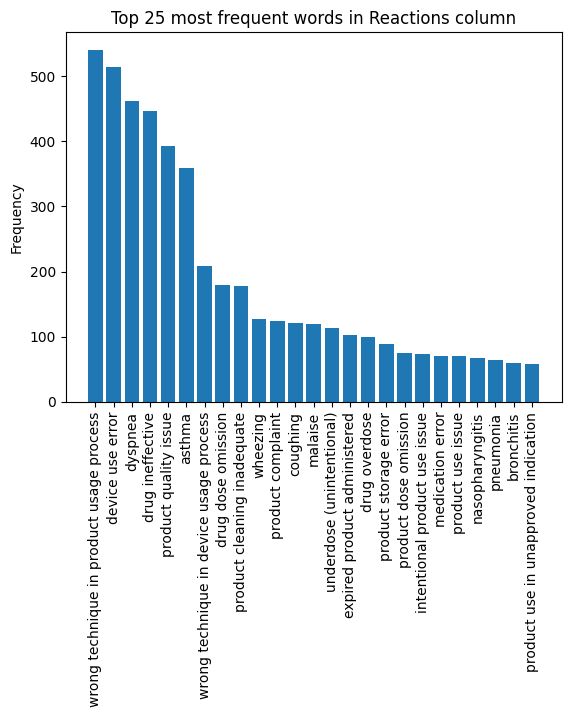

<Figure size 640x480 with 0 Axes>

In [42]:
# create a dataframe from the sorted_word_freq list
Dulera_df = pd.DataFrame(sorted_word_freq, columns=['word', 'freq'])

# save the dataframe as a CSV file
Dulera_df.to_csv('Ventolin_df_word_freq.csv', index=False)

# print the top 10 most frequent words
print(Dulera_df.head(10))

# create a list of words from the 'Reactions' column
reactions = drugname_df['UMLS_pt'].str.lower().str.cat(sep=',')

# split the reactions by comma and semi-colon
words = reactions.split(',') + [x.strip() for x in reactions.split(';')]

# count the frequency of each word
word_counts = Counter(words)

# create a list of the top 100 words and their counts
top_words = word_counts.most_common(25)

# create a bar chart
plt.bar([x[0] for x in top_words], [x[1] for x in top_words])
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Top 25 most frequent words in Reactions column')
plt.show()
plt.savefig('top_25_reactions.png')
